# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Observations and Analysis

After reviewing all the scatter plot results, these are my observable trends:
* Of all the data points compared, the only pair that showed strong potential for further analysis was the latitude and maximum temperature pair. The closer a city was to the equator, it was likely that its temperature would be warmer than a city farther from the equator. That was shown in both the plotting of the cities and in the linear regression lines for each hemisphere. The r-squared values were midway between 0 and 1 so there was a moderate correlation.
* Humidity and wind speed have a weak to no relationship to how close a city is to the equator. Based on the plots and linear regressions, there's no correlation between a city's latitude and humidity or wind speed. They did show some grouping of points either toward the top or bottom of the plots and were somewhat linear in shape but were still pretty scattered in both plots so no relationship. Their linear regressions were also pretty flat. The r-squared values were very close to 0 so a weak or no correlation. It would be difficult to predict either humidity or wind speed based on a city's known latitude.
* Of all the variable pairs plotted, the plot points for cloudiness and latitude were the most scattered so no apparent relationship between the two. It was also difficult to determine visually if there were outliers because the plot points were so scattered. Their linear regressions were also pretty flat. The r-squared values were very close to 0 so a weak or no correlation. It would be really difficult to predict a city's cloudiness based on its known latitude.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import json
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/City_Data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set the main path
url = "http://api.openweathermap.org/data/2.5/weather?"

# Get all the temperatures in Fahrenheit
units = "imperial"

# Build partial query URL path
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create empty lists to hold the data being returned
city_name = []
lat = []
lng = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

print("Beginning data retrieval")
print("----------------------------------")
    
# Loop through the cities to get their info and populate their respective lists
for city in cities:
    response = requests.get(query_url + city).json()

    # In case data is missing in any of the parameters, using a try/except
    try:
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        print(f"Processing record {cities.index(city)+1} | {city}")
    except:
        print("City data missing--skipping")
        pass
print("----------------------------------")
print("Data Retrieval is complete")
print("----------------------------------")      

        

Beginning data retrieval
----------------------------------
Processing record 1 | kapaa
Processing record 2 | upernavik
Processing record 3 | albany
Processing record 4 | punta arenas
Processing record 5 | naze
Processing record 6 | barrow
Processing record 7 | mar del plata
Processing record 8 | ayan
Processing record 9 | puerto ayora
Processing record 10 | new norfolk
Processing record 11 | port lincoln
Processing record 12 | bikin
Processing record 13 | cape town
Processing record 14 | ushuaia
Processing record 15 | jimbolia
Processing record 16 | port elizabeth
City data missing--skipping
Processing record 18 | ust-kuyga
Processing record 19 | bud
Processing record 20 | kyra
Processing record 21 | provideniya
Processing record 22 | georgetown
Processing record 23 | guaruja
Processing record 24 | muros
Processing record 25 | pisco
Processing record 26 | namatanai
City data missing--skipping
City data missing--skipping
Processing record 29 | saint george
Processing record 30 | vanimo

Processing record 254 | saint-francois
Processing record 255 | ketchikan
Processing record 256 | suluq
Processing record 257 | pilar
Processing record 258 | mount isa
Processing record 259 | dryden
Processing record 260 | nanortalik
Processing record 261 | coahuayana
Processing record 262 | moryakovskiy zaton
Processing record 263 | rupert
Processing record 264 | qaanaaq
Processing record 265 | kholtoson
Processing record 266 | babra
Processing record 267 | san pedro
City data missing--skipping
Processing record 269 | hutchinson
City data missing--skipping
Processing record 271 | dalvik
Processing record 272 | upata
Processing record 273 | aras
City data missing--skipping
Processing record 275 | leningradskiy
Processing record 276 | takanosu
Processing record 277 | voh
Processing record 278 | qixia
Processing record 279 | calama
Processing record 280 | chifeng
Processing record 281 | eydhafushi
Processing record 282 | boguchany
Processing record 283 | nagua
Processing record 284 | tabo

Processing record 505 | hamilton
Processing record 506 | uvira
City data missing--skipping
Processing record 508 | hanyang
Processing record 509 | high level
City data missing--skipping
Processing record 511 | marienburg
Processing record 512 | tarko-sale
Processing record 513 | russkaya polyana
City data missing--skipping
Processing record 515 | latung
Processing record 516 | xingyi
Processing record 517 | marawi
City data missing--skipping
Processing record 519 | richmond
Processing record 520 | tricase
Processing record 521 | souillac
Processing record 522 | college
City data missing--skipping
Processing record 524 | palauig
Processing record 525 | rawson
Processing record 526 | imeni morozova
Processing record 527 | pavlikeni
City data missing--skipping
City data missing--skipping
Processing record 530 | sao joao da barra
Processing record 531 | itapuranga
Processing record 532 | road town
Processing record 533 | calabozo
Processing record 534 | camacha
Processing record 535 | havo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Make sure all the counts are the same
print(f"City: {len(city_name)}")
print(f"Lat: {len(lat)}")
print(f"Lng: {len(lng)}")
print(f"Temp: {len(temp)}")
print(f"Humidity: {len(humidity)}")
print(f"Cloudiness: {len(cloudiness)}")
print(f"Wind Speed: {len(wind_speed)}")
print(f"Country: {len(country)}")
print(f"Date: {len(date)}")


City: 552
Lat: 552
Lng: 552
Temp: 552
Humidity: 552
Cloudiness: 552
Wind Speed: 552
Country: 552
Date: 552


In [5]:
# Create a dictionary using all the newly populated lists
data_dict = {"City": city_name,
            "Lat": lat,
            "Lng": lng,
            "Temp": temp,
            "Humidity": humidity,
            "Cloudiness": cloudiness,
            "Wind Speed": wind_speed,
            "Country": country,
            "Date": date}

# Create a dataframe from the dictionary
city_weather_df = pd.DataFrame(data_dict)

# Double-check the counts are all the same
city_weather_df.count()

City          552
Lat           552
Lng           552
Temp          552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [6]:
# Export the City_Data into a csv
city_weather_df.to_csv(output_data_file, index=False)

# Display the dataframe
city_weather_df

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.08,-159.32,84.20,66,40,12.75,US,1596406323
1,Upernavik,72.79,-56.15,44.08,69,93,6.62,GL,1596406323
2,Albany,42.60,-73.97,87.01,65,47,9.80,US,1596406324
3,Punta Arenas,-53.15,-70.92,39.20,80,24,6.93,CL,1596406043
4,Naze,28.37,129.48,82.40,78,40,9.17,JP,1596406216
...,...,...,...,...,...,...,...,...,...
547,Kahului,20.89,-156.47,87.80,52,40,23.04,US,1596406419
548,Hualmay,-11.10,-77.61,64.08,73,18,10.20,PE,1596406465
549,Punta de Piedra,7.62,-71.49,80.83,88,59,2.55,VE,1596406466
550,Iwaki,37.05,140.88,77.00,88,20,3.36,JP,1596406466


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# Check to see if there are any rows with a Humidity > 100
high_humidity = city_weather_df.loc[city_weather_df["Humidity"] > 100]
high_humidity.describe()

,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,Date
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#  Get the indices of cities that have humidity over 100%.
idx = city_weather_df.index[city_weather_df["Humidity"] > 100]
idx

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_weather_df.loc[city_weather_df["Humidity"] <= 100]
clean_city_data

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.08,-159.32,84.20,66,40,12.75,US,1596406323
1,Upernavik,72.79,-56.15,44.08,69,93,6.62,GL,1596406323
2,Albany,42.60,-73.97,87.01,65,47,9.80,US,1596406324
3,Punta Arenas,-53.15,-70.92,39.20,80,24,6.93,CL,1596406043
4,Naze,28.37,129.48,82.40,78,40,9.17,JP,1596406216
...,...,...,...,...,...,...,...,...,...
547,Kahului,20.89,-156.47,87.80,52,40,23.04,US,1596406419
548,Hualmay,-11.10,-77.61,64.08,73,18,10.20,PE,1596406465
549,Punta de Piedra,7.62,-71.49,80.83,88,59,2.55,VE,1596406466
550,Iwaki,37.05,140.88,77.00,88,20,3.36,JP,1596406466


In [10]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv

# Output File (CSV)
clean_city_data.to_csv(output_data_file, index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

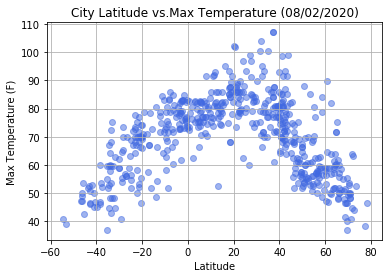

Each dot in this scatter plot represents a city; its location is determined by its latitude along the x-axis and its maximum temperature in Fahrenheit along the y-axis. Based on the shape of the plot, these two variables have a moderate to strong non-linear relationship with a few potential outliers.


In [42]:
# Get the date of the data. Averaging them to get one date.
# Got help for this from Jeff's response at:
#https://stackoverflow.com/questions/19231871/convert-unix-time-to-readable-date-in-pandas-dataframe
data_datetime = pd.to_datetime(clean_city_data["Date"],unit='s').mean()

plt.scatter(clean_city_data['Lat'],clean_city_data['Temp'],
            c="royalblue",  alpha=0.5)
plt.title(f"City Latitude vs.Max Temperature ({data_datetime:%m/%d/%Y})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()
print("Each dot in this scatter plot represents a city; its location is determined by its latitude along the x-axis and \
its maximum temperature in Fahrenheit along the y-axis. Based on the shape of the plot, these two variables have a moderate \
to strong non-linear relationship with a few potential outliers.")

## Latitude vs. Humidity Plot

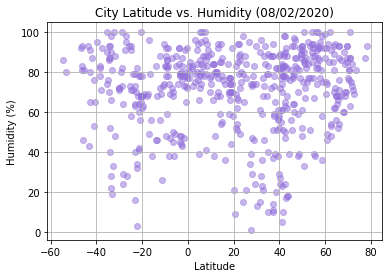

Each dot in this scatter plot represents a city; its location is determined by its latitude along the x-axis and its humidity along the y-axis. Based on the plot, there appears to be a weak relationship at best between where a city is located and its humidity.


In [43]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Humidity'],
            c="mediumpurple",  alpha=0.5)
plt.title(f"City Latitude vs. Humidity ({data_datetime:%m/%d/%Y})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()
print("Each dot in this scatter plot represents a city; its location is determined by its latitude along the x-axis and \
its humidity along the y-axis. Based on the plot, there appears to be a weak relationship at best between where a city is \
located and its humidity.")

## Latitude vs. Cloudiness Plot

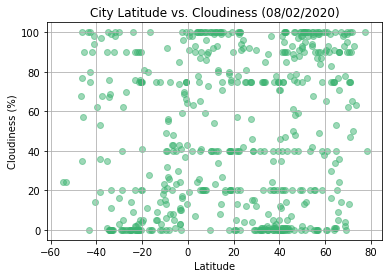

Each dot in this scatter plot represents a city; its location is determined by its latitude along the x-axis and its percentage of cloudiness along the y-axis. Based on the plot, there appears to be no relationship between a city's latitude and humidity.


In [44]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Cloudiness'],
            c="mediumseagreen",  alpha=0.5)
plt.title(f"City Latitude vs. Cloudiness ({data_datetime:%m/%d/%Y})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()
print("Each dot in this scatter plot represents a city; its location is determined by its latitude along the x-axis and \
its percentage of cloudiness along the y-axis. Based on the plot, there appears to be no relationship between a city's \
latitude and humidity.")

## Latitude vs. Wind Speed Plot

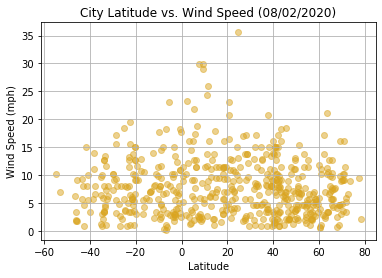

Each dot in this scatter plot represents a city; its location is determined by its latitude along the x-axis and its wind speed along the y-axis. Based on the plot, there does seem to be a linear relationship between the variables but it's not positive or negative and there are potential outliers.


In [45]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Wind Speed'],
            c="goldenrod",  alpha=0.5)
plt.title(f"City Latitude vs. Wind Speed ({data_datetime:%m/%d/%Y})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()
print("Each dot in this scatter plot represents a city; its location is determined by its latitude along the x-axis and \
its wind speed along the y-axis. Based on the plot, there does seem to be a linear relationship between the variables but it's \
not positive or negative and there are potential outliers.")

## Linear Regression

In [46]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression_plots(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

In [47]:
# Create Northern and Southern Hemisphere DataFrames
north_hemi_df = pd.DataFrame(clean_city_data.loc[clean_city_data["Lat"] >= 0])

south_hemi_df = pd.DataFrame(clean_city_data.loc[clean_city_data["Lat"] < 0])


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.45274409232140234


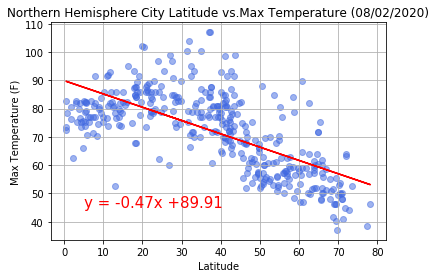

In [48]:
# Perform a linear regression on latitude vs. temperature
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create the plot
plt.scatter(north_hemi_df['Lat'],north_hemi_df['Temp'], c="royalblue",  alpha=0.5)
plt.plot(x_values,regress_values,"r-")

# Add labels and annotate the line equation
plt.title(f"Northern Hemisphere City Latitude vs.Max Temperature ({data_datetime:%m/%d/%Y})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.annotate(line_eq,(5,45),fontsize=15,color="red")
plt.grid()

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save an image of the plot and show on screen
plt.savefig("images/NorthernHemisphere_Lat_Temp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5985745406336728


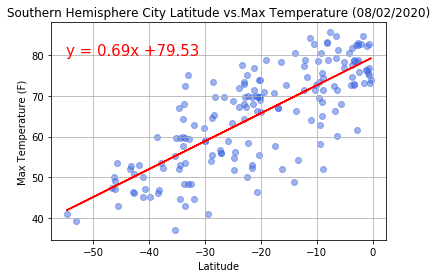

In [49]:
# Perform a linear regression on latitude vs. temperature
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create the plot
plt.scatter(south_hemi_df['Lat'],south_hemi_df['Temp'], c="royalblue",  alpha=0.5)
plt.plot(x_values,regress_values,"r-")

# Add labels and annotate the line equation
plt.title(f"Southern Hemisphere City Latitude vs.Max Temperature ({data_datetime:%m/%d/%Y})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")
plt.grid()

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save an image of the plot and show on screen
plt.savefig("images/SouthernHemisphere_Lat_Temp.png")
plt.show()

#### Northern and Southern Hemisphere Max Temp vs. Latitude Linear Regression Analysis

The linear regression in both the northern and southern hemiphere plots is showing that the closer a city is to the \
Equator, the warmer its maximum temperature is likely to be. Both plots show a moderate to strong linear relationship between the two variables; the northern hemisphere's is negative whereas the southern hemisphere's is positive. There's also a stronger correlation between temperature and latitude in the southern hemisphere but that may be partly due to having more data points  to plot in the northern hemisphere plot and just the randomness of the chosen cities. The correlation in both would warrant 
further analysis.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.002156026237635893


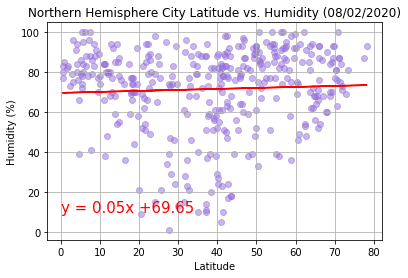

In [50]:
# Perform a linear regression on latitude vs. humidity
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create the plot
plt.scatter(north_hemi_df['Lat'],north_hemi_df['Humidity'], c="mediumpurple",  alpha=0.5)
plt.plot(x_values,regress_values,"r-")

# Add labels and annotate the line equation
plt.title(f"Northern Hemisphere City Latitude vs. Humidity ({data_datetime:%m/%d/%Y})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.grid()

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save an image of the plot and show on screen
plt.savefig("images/NorthernHemisphere_Lat_Humidity.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.005094021610331728


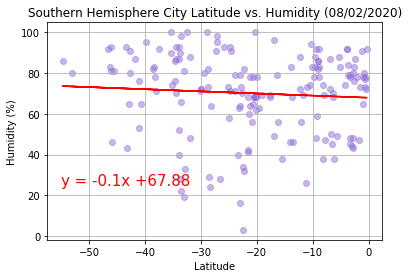

In [51]:
# Perform a linear regression on latitude vs. humidity
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create the plot
plt.scatter(south_hemi_df['Lat'],south_hemi_df['Humidity'], c="mediumpurple",  alpha=0.5)
plt.plot(x_values,regress_values,"r-")

# Add labels and annotate the line equation
plt.title(f"Southern Hemisphere City Latitude vs. Humidity ({data_datetime:%m/%d/%Y})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.grid()

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save an image of the plot and show on screen
plt.savefig("images/SouthernHemisphere_Lat_Humidity.png")

plt.show()

#### Northern and Southern Hemisphere Humidity vs. Latitude Linear Regression Analysis

Based on the plot and the linear regression, there does not seem to be a relationship between latitude and humidity in both hemispheres. The r-squared value in both plots is really close to 0 which means there is no correlation. Further analysis would not be warrented on this variable pair.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00016773600722072468


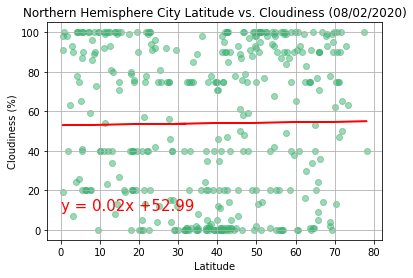

In [52]:
# Perform a linear regression on latitude vs. cloudiness
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create the plot
plt.scatter(north_hemi_df['Lat'],north_hemi_df['Cloudiness'], c="mediumseagreen",  alpha=0.5)
plt.plot(x_values,regress_values,"r-")

# Add labels and annotate the line equation
plt.title(f"Northern Hemisphere City Latitude vs. Cloudiness ({data_datetime:%m/%d/%Y})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.grid()

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save an image of the plot and show on screen
plt.savefig("images/NorthernHemisphere_Lat_Cloudiness.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.013508688638194207


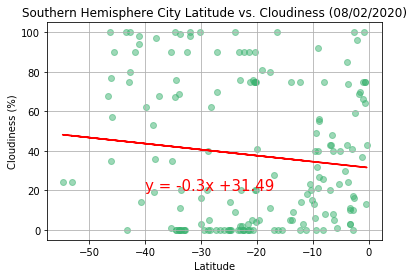

In [53]:
# Perform a linear regression on latitude vs. cloudiness
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create the plot
plt.scatter(south_hemi_df['Lat'],south_hemi_df['Cloudiness'], c="mediumseagreen",  alpha=0.5)
plt.plot(x_values,regress_values,"r-")

# Add labels and annotate the line equation
plt.title(f"Southern Hemisphere City Latitude vs. Cloudiness ({data_datetime:%m/%d/%Y})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.grid()

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save an image of the plot and show on screen
plt.savefig("images/SouthernHemisphere_Lat_Cloudiness.png")

plt.show()

#### Northern and Southern Hemisphere Cloudiness vs. Latitude Linear Regression Analysis

Based on the plot points and the linear regression, there is a very weak to no correlation between cities' cloudiness and latitude. The r-squared value is a little higher in the southern hemisphere but even with that, there's still less than a 2% chance that a city's latitude would determine its cloudiness. This pair of variables does not have a relationship and there would be no need to pursue further analysis. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04470977575955494


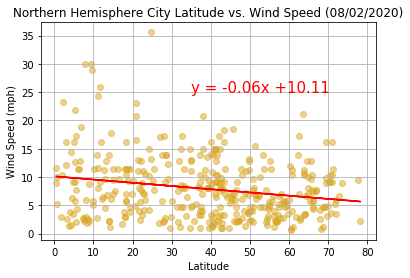

In [54]:
# Perform a linear regression on latitude vs. wind speed
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create the plot
plt.scatter(north_hemi_df['Lat'],north_hemi_df['Wind Speed'], c="goldenrod",  alpha=0.5)
plt.plot(x_values,regress_values,"r-")

# Add labels and annotate the line equation
plt.title(f"Northern Hemisphere City Latitude vs. Wind Speed ({data_datetime:%m/%d/%Y})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq,(35,25),fontsize=15,color="red")
plt.grid()

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save an image of the plot and show on screen
plt.savefig("images/NorthernHemisphere_Lat_WindSpeed.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.003749954890564247


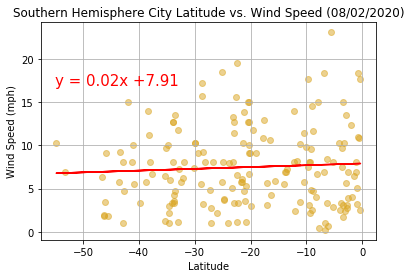

In [55]:
# Perform a linear regression on latitude vs. wind speed
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create the plot
plt.scatter(south_hemi_df['Lat'],south_hemi_df['Wind Speed'], c="goldenrod",  alpha=0.5)
plt.plot(x_values,regress_values,"r-")

# Add labels and annotate the line equation
plt.title(f"Southern Hemisphere City Latitude vs. Wind Speed ({data_datetime:%m/%d/%Y})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq,(-55,17),fontsize=15,color="red")
plt.grid()

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save an image of the plot and show on screen
plt.savefig("images/SouthernHemisphere_Lat_WindSpeed.png")

plt.show()

#### Northern and Southern Hemisphere Wind Speed vs. Latitude Linear Regression Analysis

Based on the plots and linear regressions, there's no correlation between cities' latitude and wind speed. The plot points are  somewhat linear in shape but are still pretty scattered in both plots so no relationship. The r-squared values are also very close to 0 so a weak or no correlation. The northern hemisphere's r-squared value is higher but there's still less than a 5% chance that a city's latitude could determine its wind speed. This pair of variables does not seem to warrant further analysis. 